## 1. Instalación e importación de librerías

In [ ]:
# Solo es necesario ejecutar una vez en la terminal o en una celda con '!'
!pip install yfinance pandas numpy matplotlib plotly

In [2]:
# Importamos las librerías básicas
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


## 2. Descarga de datos con yfinance

In [3]:
# Definimos el ticker y el rango de fechas
tickers = ['NVDA', 'AAPL']
start_date = "2020-01-01"
end_date = "2022-12-31"

# Descarga de datos diarios
dataframe = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)

# Primer vistazo
dataframe.head()


[*********************100%***********************]  2 of 2 completed


Price           Close                 High                  Low            \
Ticker           AAPL      NVDA       AAPL      NVDA       AAPL      NVDA   
Date                                                                        
2020-01-02  72.538506  5.971409  72.598884  5.971409  71.292296  5.892010   
2020-01-03  71.833282  5.875832  72.594048  5.919639  71.608677  5.826798   
2020-01-06  72.405670  5.900473  72.444313  5.905700  70.703005  5.756359   
2020-01-07  72.065178  5.971909  72.671371  6.017707  71.845400  5.883797   
2020-01-08  73.224411  5.983109  73.526303  6.024427  71.768086  5.927604   

Price            Open               Volume             
Ticker           AAPL      NVDA       AAPL       NVDA  
Date                                                   
2020-01-02  71.545882  5.942536  135480400  237536000  
2020-01-03  71.765659  5.851689  146322800  205384000  
2020-01-06  70.954181  5.782494  118387200  262636000  
2020-01-07  72.415368  5.928848  108872000  314856000  
2020-01-08  71.768086  5.967677  132079200  277108000

In [4]:
# Elegimos la columna que queramos (preci ajustado)
adj_close = dataframe['Close']

adj_close.head()

Ticker,AAPL,NVDA
Date,,
2020-01-02,72.538506,5.971409
2020-01-03,71.833282,5.875832
2020-01-06,72.405670,5.900473
2020-01-07,72.065178,5.971909
2020-01-08,73.224411,5.983109


<Axes: xlabel='Date'>

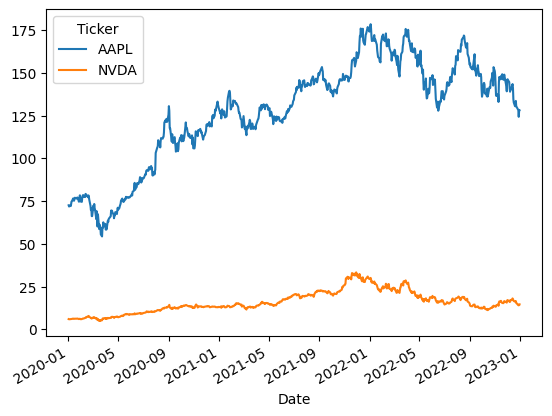

In [16]:
adj_close_clean.plot()

## 3. Limpieza de datos

- Revisamos si hay valores faltantes

- Ajustamos tipos de dato

- Reindexamos si es necesario

In [ ]:
# 3.1 Detectar valores nulos
print("Valores nulos por columna:")
print(adj_close.isna().sum())

Recordemos que df_clean = df.copy() crea una copia nueva y la guarda en la variable de antes del igual.

Hay2 formas de eliminar valores faltantes:
- Por filas: (para eliminar días problemáticos)
    - df.dropna(axis=0, how='ANY')

        elimina todos los valores de la fila si hay CUALQUIER valor NaN (nulo)

    - df.dropna(axis=0, how='ALL')

        elimina todos los valores de la fila si TODOS son NaN (nulo)
        
- Por columnas: (para eliminar activos problemáticos)
    - df.dropna(axis=1, how='ANY')

        elimina todos los valores de la columna si hay CUALQUIER valor NaN (nulo)

    - df.dropna(axis=1, how='ALL')

        elimina todos los valores de la columna si TODOS son NaN (nulo)

- En la función dropna hay otros 2 argumentos que nos pueden interesar:
    - inplace=, True si queremos que la limpieza se haga en el mismo dataframe
    - thresh=, para establecer el número mínimo de valores nulos que tiene que haber para que se elimine la fila o columna en cuestión

In [11]:
# 3.2 Eliminar nulos (si los hubiese)
adj_close_clean = adj_close.dropna(axis=0)


In [12]:
# 3.3 Indexar por fecha como DatetimeIndex
adj_close_clean.index = pd.to_datetime(adj_close_clean.index)

adj_close_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2020-01-02 to 2022-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    756 non-null    float64
 1   NVDA    756 non-null    float64
dtypes: float64(2)
memory usage: 17.7 KB


## 4. Slicing con condicionales

In [18]:
# Extraer datos del año 2021
#datos2021=dataframe[(dataframe['Date'])>"2021-01-01" & <"2021-12-31"]
# TO-DO

#datos2021=(dataframe['Date'] > "2021-01-01") & (dataframe['Date'] < "2021-12-31")

precio_2021= adj_close_clean.loc['2021']
precio_2021

Ticker,AAPL,NVDA
Date,,
2021-01-04,126.096596,13.077453
2021-01-05,127.655602,13.367904
2021-01-06,123.358543,12.579825
2021-01-07,127.567909,13.307320
2021-01-08,128.668991,13.240253
...,...,...
2021-12-27,176.796082,30.886890
2021-12-28,175.776428,30.265060
2021-12-29,175.864685,29.944664


In [14]:
# Días con cierre por encima de los 150 USD
# TO-DO
days_above_150=adj_close_clean[(adj_close_clean['AAPL']>150)|(adj_close_clean['NVDA']>150)]

In [ ]:
# Días con cierre por encima de los 150 USD para cualquiera de las acciones
# TO-DO

## 5. Visualización

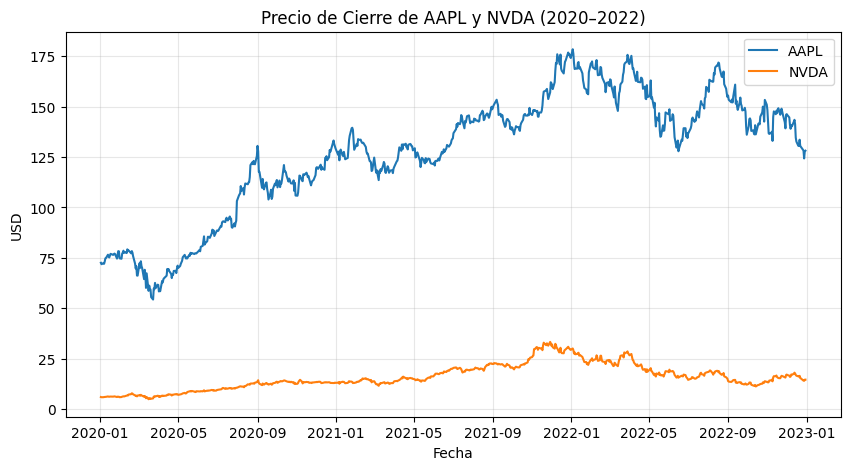

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(adj_close_clean.index, adj_close_clean['AAPL'], color='tab:blue', lw=1.5, label='AAPL')
plt.plot(adj_close_clean.index, adj_close_clean['NVDA'], color='tab:orange', lw=1.5, label='NVDA')
plt.title('Precio de Cierre de AAPL y NVDA (2020–2022)')
plt.xlabel('Fecha')
plt.ylabel('USD')
plt.grid(alpha=0.3)
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(adj_close_clean['AAPL'], bins=50, color='tab:green', edgecolor='pink', label='AAPL')
plt.title('Distribución de Close Diario')
plt.xlabel('Close')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()